# Unsupervised Learning
A project by Dustin Pacholleck

## Introduction

In the financial market it is vital to observe how companies are performing. I special focus is usually on the reports every publicly traded company has to issue every quarter. 
To get a quick feeling about the vast variety of data, clustering comes in handy. It allows the investor to see similary performing companies at a glance. He can quickly see which companies to investigate further for his investment decision. Not only for investors it becomes relevant to group companies into clusters. Also bank can leverage this method to preliminary investigate the health of a company based on its financial statement.

Therefore, this projects tries to apply clustering on the S&P 500 companies based on their quarterly report in quarter 3 2021. The data was mined in a project by Pierre-Louis Danieau and can be found on https://www.kaggle.com/pierrelouisdanieau/financial-data-sp500-companies. 

## Set-Up

In [1]:
install.packages("psych")
install.packages("data.table")
#install.packages("ggplot2", repo="http://cran.r-project.org",dep=TRUE)
#install.packages("gridExtra", repo="http://cran.r-project.org",dep=TRUE)
#install.packages("tidyverse")


  There is a binary version available but the source version is later:
      binary source needs_compilation
psych  2.1.3  2.1.9             FALSE



installing the source package 'psych'




  There is a binary version available but the source version is later:
           binary source needs_compilation
data.table 1.14.0 1.14.2              TRUE

  Binaries will be installed
package 'data.table' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'data.table'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\Users\duzzi\anaconda3\Lib\R\library\00LOCK\data.table\libs\x64\datatable.dll nach C:\Users\duzzi\anaconda3\Lib\R\library\data.table\libs\x64\datatable.dll zu kopieren: Permission denied"Warning message:
"restored 'data.table'"


The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpWscaCT\downloaded_packages


In [2]:
library(psych)
library(data.table)

Warning message:
"package 'data.table' was built under R version 3.6.3"

## Data Preperation

In [3]:
df <- read.csv("C:/Users/duzzi/Documents/University_Projects/Unsupervised-Learning/data/financial ratios.csv")

In [4]:
head(df)

Date,return_assets,return_capital,return_equity,return_invested_capital,return_common_equity,gross_margin,sga_margin,ebitda_margin,ebita_margin,...,ebitda_excl_oper_leases_int,ebitda_excl_oper_leases_capex_int,total_debt_ebitda_excl_oper_leases,net_debt_ebitda_excl_oper_leases,total_debt_ebitda_excl_oper_leases_capex,net_debt_ebitda_excl_oper_leases_capex,total_rev_employee,z_score,capex_pct_rev,Ticker
2000-03-31,8.1325,11.8544,34.6943,8.9006,34.4562,43.7162,33.8856,10.7388,8.5427,...,7.75149,7.75149,2.98508,2.90013,2.98508,2.90013,NA,NA,NA,ADS.DE
2000-06-30,7.5078,11.1247,33.5743,8.2673,33.5261,43.4704,34.1151,10.2860,8.0800,...,7.21278,7.21278,3.23013,3.08610,3.23013,3.08610,NA,NA,NA,ADS.DE
2000-09-30,6.9585,9.9036,24.8543,6.7232,23.8058,43.5530,34.7928,9.6662,7.4725,...,6.65034,6.65034,3.60445,3.48515,3.60445,3.48515,NA,NA,NA,ADS.DE
2000-12-31,7.2364,10.5299,25.1156,5.3548,24.3008,43.3248,34.4882,9.8206,8.5524,...,5.28044,4.13026,3.32657,3.13808,4.25295,4.01197,436.671,3.00557,2.1391,ADS.DE
2001-03-31,7.0943,10.2720,22.6511,6.3613,21.1993,43.2267,34.2475,9.9938,7.6808,...,4.56918,4.56918,3.35310,3.23560,3.35310,3.23560,NA,NA,NA,ADS.DE
2001-06-30,7.0484,10.2470,23.8024,6.2771,22.3208,43.2883,34.1235,10.1456,7.8260,...,4.55685,4.55685,3.54198,3.39241,3.54198,3.39241,NA,NA,NA,ADS.DE


In [5]:
describe(df)

Warning message in FUN(newX[, i], ...):
"kein nicht-fehlendes Argument für min; gebe Inf zurück"Warning message in FUN(newX[, i], ...):
"kein nicht-fehlendes Argument für max; gebe -Inf zurück"

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Date*,1,4300,43.5000000,24.8272702,43.500000,43.5000000,31.8759000,1.00000,86.00000,85.00000,0.00000000,-1.20116150,0.378612322
return_assets,2,3903,4.7382920,4.2487671,3.912500,4.1763710,3.7342246,-14.20870,28.36340,42.57210,1.30276640,2.85433800,0.068008571
return_capital,3,3691,8.6938993,6.9219298,7.145000,7.7415820,4.3902751,-20.82470,45.72230,66.54700,1.51895759,3.84975344,0.113934479
return_equity,4,4006,13.6460267,12.5674542,13.150550,13.4933490,8.3067113,-186.07230,96.95270,283.02500,-1.15047959,21.37993711,0.198560034
return_invested_capital,5,3691,5.4935847,8.1681071,4.414200,4.9306397,4.4710768,-57.30090,52.27260,109.57350,0.44437522,6.68039528,0.134446468
return_common_equity,6,4006,13.4942381,12.9526738,13.046450,13.3755119,8.2236857,-187.74280,96.95270,284.69550,-1.28692181,21.28409296,0.204646328
gross_margin,7,3835,41.6504854,20.1147490,40.562000,40.6079050,21.4303900,-10.43600,102.85270,113.28870,0.43288738,-0.28494854,0.324811902
sga_margin,8,3887,24.2092435,21.4947072,21.026400,21.7393167,15.8055538,-50.85270,298.74560,349.59830,4.43120374,40.26165683,0.344765867
ebitda_margin,9,3825,17.8906905,14.5545000,17.165600,17.9372493,10.7957002,-198.74560,63.74620,262.49180,-4.90526004,60.94341186,0.235332317
ebita_margin,10,3835,13.3119734,14.1580748,13.186500,13.2845538,8.2564511,-201.61420,93.44500,295.05920,-5.06639336,66.29019580,0.228623842


In [6]:
# Check Structure
str(df)

'data.frame':	4300 obs. of  51 variables:
 $ Date                                    : Factor w/ 86 levels "2000-03-31","2000-06-30",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ return_assets                           : num  8.13 7.51 6.96 7.24 7.09 ...
 $ return_capital                          : num  11.9 11.1 9.9 10.5 10.3 ...
 $ return_equity                           : num  34.7 33.6 24.9 25.1 22.7 ...
 $ return_invested_capital                 : num  8.9 8.27 6.72 5.35 6.36 ...
 $ return_common_equity                    : num  34.5 33.5 23.8 24.3 21.2 ...
 $ gross_margin                            : num  43.7 43.5 43.6 43.3 43.2 ...
 $ sga_margin                              : num  33.9 34.1 34.8 34.5 34.2 ...
 $ ebitda_margin                           : num  10.74 10.29 9.67 9.82 9.99 ...
 $ ebita_margin                            : num  8.54 8.08 7.47 8.55 7.68 ...
 $ ebit_margin                             : num  8.54 8.08 7.47 7.55 7.68 ...
 $ earning_co_margin                       : num

In [7]:
df$Date <- as.Date(df$Date)
df$Ticker <- as.character(df$Ticker)
#df$firm <- as.character(df$firm)

In [8]:
dt <- as.data.table(df, TRUE)

In [9]:
max(dt$Date)

[1] "2021-06-30"

In [10]:
# Only most recent date
dt_adjust <- dt[Date== "2021-06-30"]

In [11]:
# remove rn and x 
dt_adjust <- dt_adjust[, !c("rn")]

In [12]:
#remove duplicates
dt_adjust <- dt_adjust[!duplicated(dt_adjust)]

### Reinspect dataframe after first cleaning

In [13]:
describe(dt_adjust)

Warning message in FUN(newX[, i], ...):
"kein nicht-fehlendes Argument für min; gebe Inf zurück"Warning message in FUN(newX[, i], ...):
"kein nicht-fehlendes Argument für min; gebe Inf zurück"Warning message in FUN(newX[, i], ...):
"kein nicht-fehlendes Argument für max; gebe -Inf zurück"Warning message in FUN(newX[, i], ...):
"kein nicht-fehlendes Argument für max; gebe -Inf zurück"

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Date,1,50,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
return_assets,2,50,3.6921280,3.0210739,3.515500,3.4731575,2.6680870,-2.96200,12.84940,15.81140,0.66305336,0.6232713,0.42724437
return_capital,3,46,6.9648196,5.5444526,5.406250,6.2774500,2.4606712,-3.69650,26.50850,30.20500,1.47769699,2.8166535,0.81748494
return_equity,4,50,12.4758760,12.4606142,9.465150,11.7359200,5.9991926,-22.74690,55.79860,78.54550,0.62308080,2.6177483,1.76219696
return_invested_capital,5,46,3.7267848,6.3425806,2.538200,2.9493368,4.4119211,-6.27400,27.51640,33.79040,1.52703584,3.2328512,0.93516250
return_common_equity,6,50,12.5486840,12.5447727,10.177850,11.8212250,5.8293608,-22.89190,57.03750,79.92940,0.64307711,2.7891475,1.77409876
gross_margin,7,46,42.5440522,18.9314700,42.490400,42.2219868,23.8083321,12.18590,80.47990,68.29400,0.08495111,-1.0988205,2.79129297
sga_margin,8,47,24.0648511,16.1046318,23.010400,23.1867282,16.7634617,0.02320,70.40160,70.37840,0.52484006,-0.2718038,2.34910198
ebitda_margin,9,46,19.3214174,10.6943506,18.558650,19.3123763,9.3960516,-15.98900,45.80300,61.79200,-0.22571275,1.3200336,1.57679597
ebita_margin,10,46,14.6803913,11.4811826,13.584950,15.0150500,6.9372337,-27.73860,43.03080,70.76940,-0.91791362,3.5843481,1.69280802


In [14]:
dt_adjust_clean <- subset (dt_adjust, select = -c(cf_total_rev, total_rev_employee))
dt_adjust_clean <- na.omit(dt_adjust_clean)

In [15]:
describe(dt_adjust_clean)

Warning message in FUN(newX[, i], ...):
"kein nicht-fehlendes Argument für min; gebe Inf zurück"Warning message in FUN(newX[, i], ...):
"kein nicht-fehlendes Argument für max; gebe -Inf zurück"

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Date,1,20,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
return_assets,2,20,4.0675850,1.8036752,3.723900,3.9116937,1.2373038,1.34530,8.08870,6.74340,0.76537451,-0.20264435,0.40331403
return_capital,3,20,5.8324150,2.7934590,4.944200,5.4651375,1.3258150,2.68850,12.33500,9.64650,1.15154089,0.16843629,0.62463643
return_equity,4,20,12.2810650,7.7385926,10.086300,11.5807437,4.1200713,-0.46330,31.62090,32.08420,0.82311672,0.02417108,1.73040191
return_invested_capital,5,20,2.9735300,2.7595269,3.288100,3.0241625,2.4482915,-2.03170,8.36110,10.39280,-0.16201943,-0.70945220,0.61704898
return_common_equity,6,20,12.2631800,7.6266135,10.961850,11.6670500,5.3541875,-0.59800,30.60010,31.19810,0.70617263,-0.18698439,1.70536261
gross_margin,7,20,39.9760700,15.9813004,42.490400,39.9305063,15.9509969,12.82500,67.26690,54.44190,-0.04238925,-1.14362439,3.57352740
sga_margin,8,20,21.2712050,13.8094597,20.601950,21.1060875,18.2793461,0.44580,44.21520,43.76940,0.09495221,-1.43018388,3.08788907
ebitda_margin,9,20,18.6531150,7.1636352,14.840250,17.7363187,5.1522574,11.17180,33.31900,22.14720,0.84577394,-0.71357166,1.60183753
ebita_margin,10,20,14.0714200,5.9007517,11.665250,13.2750937,3.3798832,6.52480,27.73700,21.21220,0.98180599,-0.17993278,1.31944819


In [16]:
#drop date, firm, ticker, R&D (high missing values)
dt_adjust <- subset(dt_adjust_clean, select = -c(Ticker, Date))

In [17]:
dt_adjust

return_assets,return_capital,return_equity,return_invested_capital,return_common_equity,gross_margin,sga_margin,ebitda_margin,ebita_margin,ebit_margin,...,total_debt_ebitda_capex,net_debt_ebitda_capex,ebitda_excl_oper_leases_int,ebitda_excl_oper_leases_capex_int,total_debt_ebitda_excl_oper_leases,net_debt_ebitda_excl_oper_leases,total_debt_ebitda_excl_oper_leases_capex,net_debt_ebitda_excl_oper_leases_capex,z_score,capex_pct_rev
6.7215,11.1180,22.2286,8.3611,22.3755,50.4007,40.0472,12.2550,10.5628,10.0997,...,1.88237,0.37963,17.52866,15.40764,2.12246,0.42805,2.41463,0.48698,4.31930,1.4828
5.2508,6.6772,14.0698,3.6637,13.8913,63.6956,19.9305,26.0702,18.0343,17.4768,...,4.89909,4.43403,16.18962,8.08198,2.66198,2.40928,5.33241,4.82621,2.81559,13.0557
3.8875,4.9025,9.4180,2.1639,8.9584,58.1834,32.5974,33.3190,27.7370,26.7917,...,6.83184,6.29848,4.27847,3.18581,5.29088,4.87782,7.10552,6.55080,1.13946,8.5091
4.1775,5.9409,5.5971,-1.1914,5.1940,25.1521,13.1452,13.6287,8.4101,8.4101,...,3.05230,2.56612,19.67715,13.26834,2.05817,1.73034,3.05230,2.56612,2.65396,4.4388
3.4287,4.3710,17.3749,5.5860,17.4116,16.8458,6.7239,14.5421,11.1883,11.0119,...,9.52968,7.95744,49.57055,32.04294,6.45730,5.39196,9.98947,8.34137,1.33151,5.1419
3.9125,5.1949,8.0722,1.7400,7.9874,34.5900,24.7654,14.7096,10.0557,9.8245,...,3.52615,1.74724,13.86859,10.44231,2.88237,1.42824,3.82812,1.89687,2.48703,3.6340
3.6595,4.9859,21.1056,5.1088,20.9595,21.0500,7.9194,12.9783,10.4077,10.0349,...,8.07725,6.51532,64.85423,49.29155,6.41133,5.17154,8.43556,6.80434,1.28171,3.1143
4.3013,5.7360,12.5641,-1.8401,12.1044,47.7520,32.5496,19.7240,13.8743,13.6551,...,4.88004,3.14151,13.61721,10.73591,3.84746,2.47679,4.88004,3.14151,2.01623,4.1734
7.6790,12.3350,31.6209,4.4138,30.6001,18.3516,0.4458,11.5584,9.4683,9.3035,...,2.64750,1.90194,17.04183,10.47809,2.24395,1.61204,3.64962,2.62186,2.76981,4.4518
1.6516,2.6885,-0.4633,-2.0317,-0.5980,28.8831,5.1961,19.5820,6.5248,5.7640,...,4.40463,2.18302,13.17353,7.91261,3.02881,1.50114,5.04260,2.49921,1.19345,7.8202


In [18]:
str(dt_adjust)

Classes 'data.table' and 'data.frame':	20 obs. of  47 variables:
 $ return_assets                           : num  6.72 5.25 3.89 4.18 3.43 ...
 $ return_capital                          : num  11.12 6.68 4.9 5.94 4.37 ...
 $ return_equity                           : num  22.23 14.07 9.42 5.6 17.37 ...
 $ return_invested_capital                 : num  8.36 3.66 2.16 -1.19 5.59 ...
 $ return_common_equity                    : num  22.38 13.89 8.96 5.19 17.41 ...
 $ gross_margin                            : num  50.4 63.7 58.2 25.2 16.8 ...
 $ sga_margin                              : num  40.05 19.93 32.6 13.15 6.72 ...
 $ ebitda_margin                           : num  12.3 26.1 33.3 13.6 14.5 ...
 $ ebita_margin                            : num  10.56 18.03 27.74 8.41 11.19 ...
 $ ebit_margin                             : num  10.1 17.48 26.79 8.41 11.01 ...
 $ earning_co_margin                       : num  6.84 12.8 13.55 3.11 10 ...
 $ ni_margin                               : num  7

In [50]:
dt_adjust_selected <- subset(dt_adjust, select = c(ebit_margin, return_equity,return_assets, asset_turns, total_liab_total_assets, total_debt_equity, ebit_int,current_ratio))

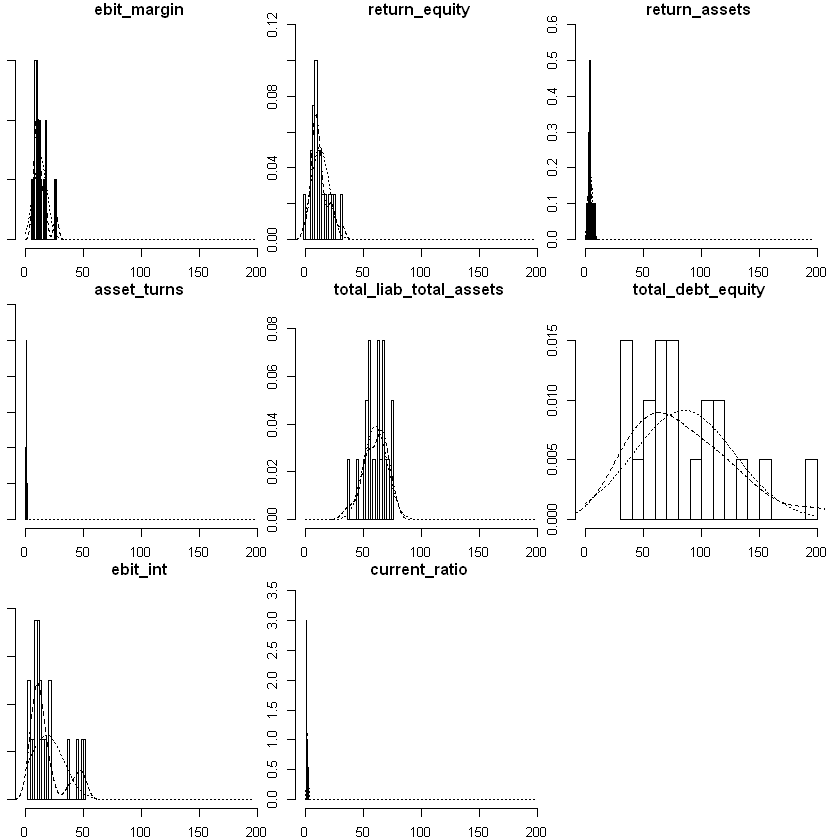

In [51]:
multi.hist(dt_adjust_selected)

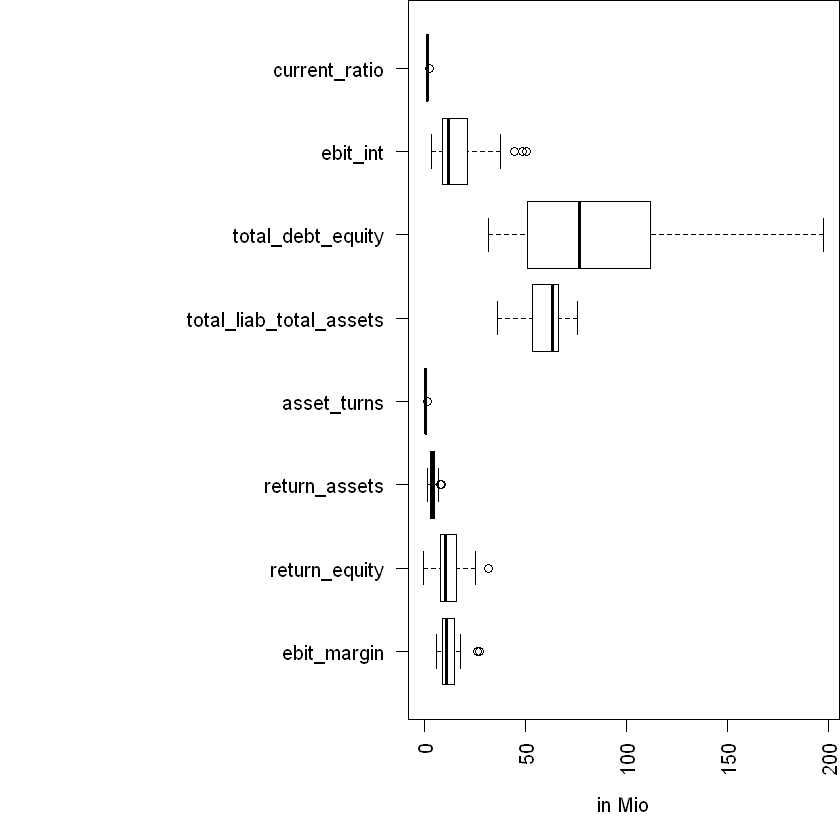

In [52]:
par(mar = c(5, 17, 0,0))
boxplot(dt_adjust_selected,horizontal=TRUE,las=2,xlab="in Mio" )


## Analyse relationship of variables

In [21]:
install.packages("PerformanceAnalytics")
library("PerformanceAnalytics")

package 'PerformanceAnalytics' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'PerformanceAnalytics'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\Users\duzzi\anaconda3\Lib\R\library\00LOCK\PerformanceAnalytics\libs\x64\PerformanceAnalytics.dll nach C:\Users\duzzi\anaconda3\Lib\R\library\PerformanceAnalytics\libs\x64\PerformanceAnalytics.dll zu kopieren: Permission denied"Warning message:
"restored 'PerformanceAnalytics'"


The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpWscaCT\downloaded_packages


Warning message:
"package 'PerformanceAnalytics' was built under R version 3.6.3"Loading required package: xts
Warning message:
"package 'xts' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'xts'

The following objects are masked from 'package:data.table':

    first, last


Attaching package: 'PerformanceAnalytics'

The following object is masked from 'package:graphics':

    legend



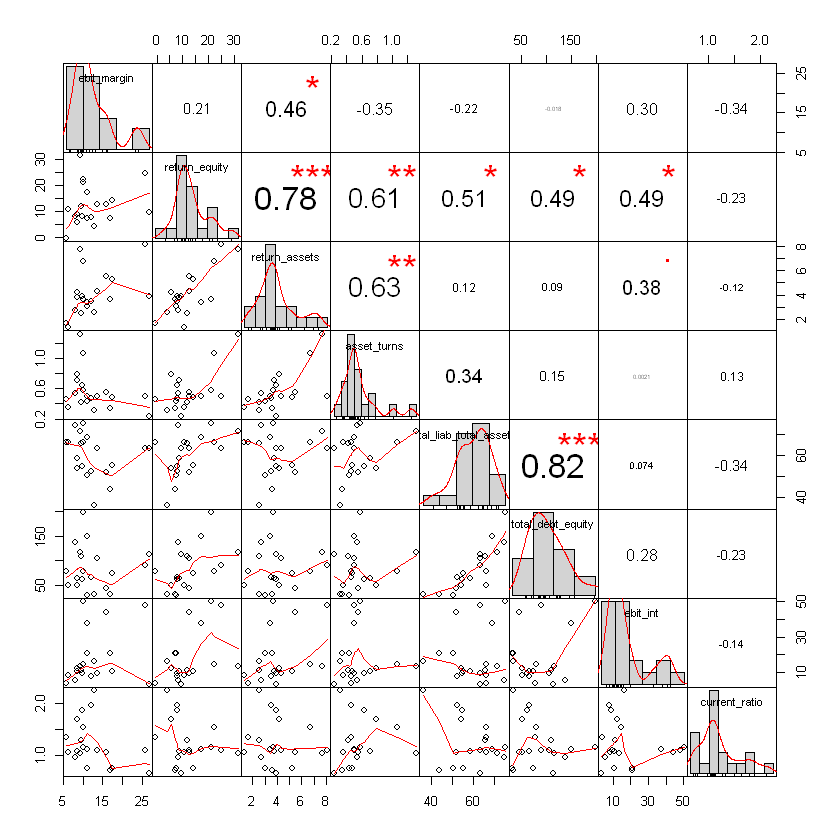

In [54]:
chart.Correlation(dt_adjust_selected, histogram=TRUE, pch=19)

From the graph above we see that we deal with highly correlated data. Therefore, we should either drop variables or we can use dimension reduction.

## Dimension Reduction

Intro to Dimension Reduction

In [23]:
# install the packages
install.packages("factoextra")
install.packages("flexclust")
install.packages("fpc")
install.packages("clustertend")
install.packages("cluster")
install.packages("ClusterR")
install.packages("tidyverse")
install.packages("dendextend")
install.packages("gridExtra", repo="http://cran.r-project.org",dep=TRUE)
library(factoextra)
library(flexclust)
library(fpc)
library(clustertend)
library(cluster)
library(ClusterR)
library(tidyverse)
library(dendextend)
library(gridExtra)

package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpWscaCT\downloaded_packages
package 'flexclust' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'flexclust'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\Users\duzzi\anaconda3\Lib\R\library\00LOCK\flexclust\libs\x64\flexclust.dll nach C:\Users\duzzi\anaconda3\Lib\R\library\flexclust\libs\x64\flexclust.dll zu kopieren: Permission denied"Warning message:
"restored 'flexclust'"


The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpWscaCT\downloaded_packages
package 'fpc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpWscaCT\downloaded_packages

  There is a binary version available but the source version is later:
            binary source needs_compilation
clustertend    1.5    1.6             FALSE



installing the source package 'clustertend'



package 'cluster' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cluster'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\Users\duzzi\anaconda3\Lib\R\library\00LOCK\cluster\libs\x64\cluster.dll nach C:\Users\duzzi\anaconda3\Lib\R\library\cluster\libs\x64\cluster.dll zu kopieren: Permission denied"Warning message:
"restored 'cluster'"


The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpWscaCT\downloaded_packages

  There is a binary version available but the source version is later:
         binary source needs_compilation
ClusterR  1.2.4  1.2.6              TRUE

  Binaries will be installed
package 'ClusterR' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'ClusterR'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\Users\duzzi\anaconda3\Lib\R\library\00LOCK\ClusterR\libs\x64\ClusterR.dll nach C:\Users\duzzi\anaconda3\Lib\R\library\ClusterR\libs\x64\ClusterR.dll zu kopieren: Permission denied"Warning message:
"restored 'ClusterR'"


The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpWscaCT\downloaded_packages


also installing the dependencies 'xfun', 'tinytex', 'knitr', 'rmarkdown', 'jsonlite', 'reprex'




  There are binary versions available but the source versions are later:
          binary source needs_compilation
xfun        0.22   0.29              TRUE
tinytex     0.31   0.37             FALSE
knitr       1.33   1.37             FALSE
rmarkdown    2.8   2.11             FALSE
jsonlite   1.7.2  1.7.3              TRUE
reprex     2.0.0  2.0.1             FALSE

  Binaries will be installed
package 'xfun' successfully unpacked and MD5 sums checked
package 'jsonlite' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\Users\duzzi\anaconda3\Lib\R\library\00LOCK\jsonlite\libs\x64\jsonlite.dll nach C:\Users\duzzi\anaconda3\Lib\R\library\jsonlite\libs\x64\jsonlite.dll zu kopieren: Permission denied"Warning message:
"restored 'jsonlite'"

package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpWscaCT\downloaded_packages


installing the source packages 'tinytex', 'knitr', 'rmarkdown', 'reprex'

Warning message in install.packages("tidyverse"):
"installation of package 'tinytex' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'knitr' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'rmarkdown' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'reprex' had non-zero exit status"


  There is a binary version available but the source version is later:
           binary source needs_compilation
dendextend 1.15.1 1.15.2             FALSE



installing the source package 'dendextend'

also installing the dependencies 'xfun', 'knitr'




  There are binary versions available but the source versions are later:
      binary source needs_compilation
xfun    0.22   0.29              TRUE
knitr   1.33   1.37             FALSE

  Binaries will be installed
package 'xfun' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpWscaCT\downloaded_packages


installing the source package 'knitr'

Warning message in install.packages("gridExtra", repo = "http://cran.r-project.org", :
"installation of package 'knitr' had non-zero exit status"Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2

Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
"package 'flexclust' was built under R version 3.6.3"Loading required package: grid
Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: modeltools
Warning message:
"package 'modeltools' was built under R version 3.6.3"Loading required package: stats4
Warning message:
"package 'fpc' was built under R version 3.6.3"Package `clustertend` is deprecated.  Use package `hopkins` instead.
Warning message:
"package 'cluster' was buil

ERROR: Error: package or namespace load failed for 'tidyverse' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'jsonlite' 1.6 is already loaded, but >= 1.7.2 is required


In [24]:
library(gridExtra)

Warning message:
"package 'gridExtra' was built under R version 3.6.3"

In [55]:
df_adj_z <- as.data.frame(lapply(dt_adjust_selected, scale))

In [56]:
rownames(df_adj_z) <- dt_adjust_clean$Ticker

In [57]:
describe(df_adj_z)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
ebit_margin,1,20,-1.269858e-16,1,-0.3381553,-0.15995514,0.5898331,-1.1749734,2.497208,3.672181,1.2613001,0.75011295,0.2236068
return_equity,2,20,5.204170e-18,1,-0.2836129,-0.09049724,0.5324058,-1.6468582,2.499141,4.145999,0.8231167,0.02417108,0.2236068
return_assets,3,20,-1.249001e-16,1,-0.1905471,-0.08642978,0.6859904,-1.5092989,2.229401,3.738700,0.7653745,-0.20264435,0.2236068
asset_turns,4,20,-9.989568e-17,1,-0.2396146,-0.16903623,0.4770827,-1.2792040,2.969638,4.248842,1.5120195,1.91905734,0.2236068
total_liab_total_assets,5,20,-9.437438e-17,1,0.3201984,0.06546020,1.1843835,-2.3664529,1.492763,3.859216,-0.5218271,-0.44982523,0.2236068
total_debt_equity,6,20,-1.040834e-17,1,-0.1825787,-0.10489977,1.0281834,-1.2177988,2.587191,3.804990,0.8199812,0.01770701,0.2236068
ebit_int,7,20,7.771697e-17,1,-0.4187273,-0.14283482,0.4191552,-0.9813941,2.176925,3.158319,1.1460742,-0.20769056,0.2236068
current_ratio,8,20,-4.163336e-17,1,-0.2906002,-0.09844067,0.7624039,-1.3105648,2.342655,3.653220,0.7912230,-0.35832615,0.2236068


In [58]:
pca <- prcomp(df_adj_z, center=FALSE, scale=FALSE)

In [59]:
pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
ebit_margin,0.1206274,-0.65408317,-0.16686320,0.13304621,-0.511984324,0.09409536,0.08229848,0.48407095
return_equity,0.5326544,-0.04836287,0.14342967,-0.01800003,0.004320242,-0.75591479,-0.34243019,0.06603029
return_assets,0.4241175,-0.29866410,0.38667187,0.17401028,-0.137677543,0.22139541,0.23833926,-0.65295690
asset_turns,0.3359885,0.28842598,0.52844146,0.21581999,0.147234660,0.41130940,-0.11319755,0.52385720
total_liab_total_assets,0.3786031,0.42340885,-0.32997891,0.08674956,-0.119469987,-0.13970242,0.71622068,0.11921052
total_debt_equity,0.3721238,0.28453085,-0.40707128,-0.26242954,-0.379442756,0.37483825,-0.48279949,-0.16856430
ebit_int,0.2934864,-0.31882455,-0.07363822,-0.70072048,0.492599552,0.16285643,0.17784900,0.12238476
current_ratio,-0.2025181,0.18858552,0.49275085,-0.58113073,-0.544349185,-0.12249429,0.16926774,0.05415839


In [60]:
df_adj_z.cov<-cov(df_adj_z)
df_adj_z.eigen<-eigen(df_adj_z.cov)
df_adj_z.eigen$values

[1] 3.11686721 1.77153302 1.52068269 0.84024652 0.51073753 0.11826732 0.10506857
[8] 0.01659714

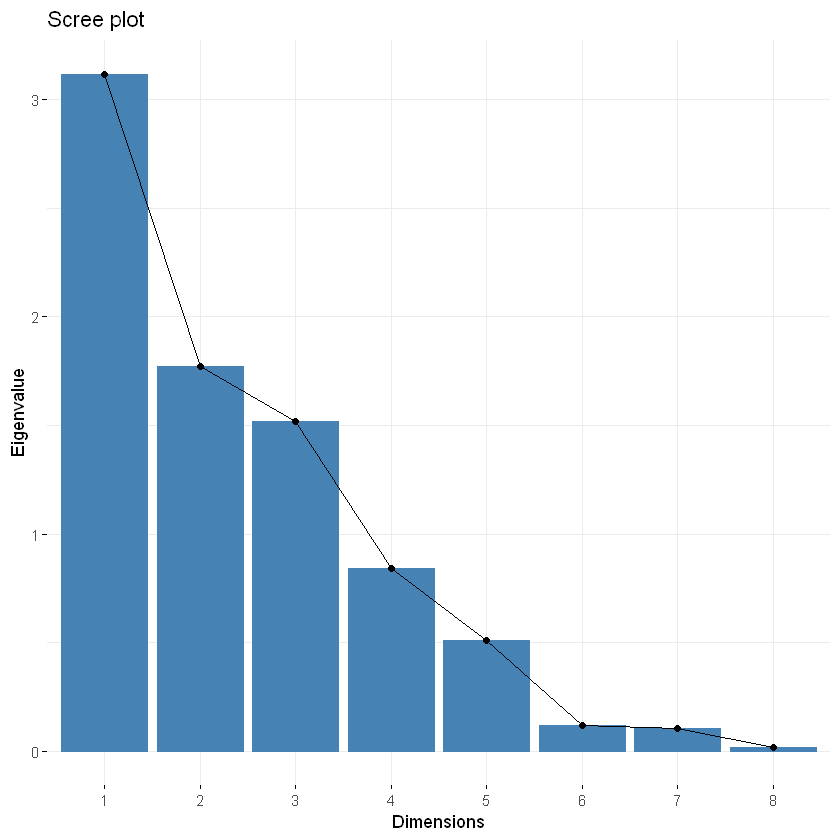

In [61]:
fviz_eig(pca, choice='eigenvalue',ncp=10)

In [62]:
summary(pca)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.7655 1.3310 1.2332 0.9166 0.71466 0.34390 0.32414
Proportion of Variance 0.3896 0.2214 0.1901 0.1050 0.06384 0.01478 0.01313
Cumulative Proportion  0.3896 0.6110 0.8011 0.9062 0.97001 0.98479 0.99793
                           PC8
Standard deviation     0.12883
Proportion of Variance 0.00207
Cumulative Proportion  1.00000

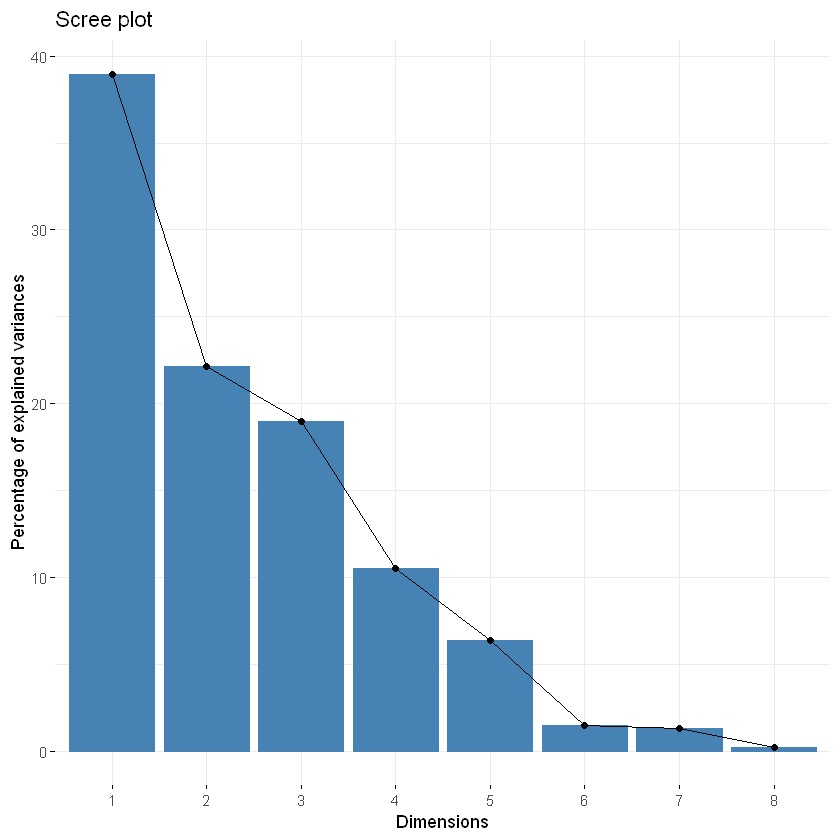

In [63]:
fviz_eig(pca,ncp=10)

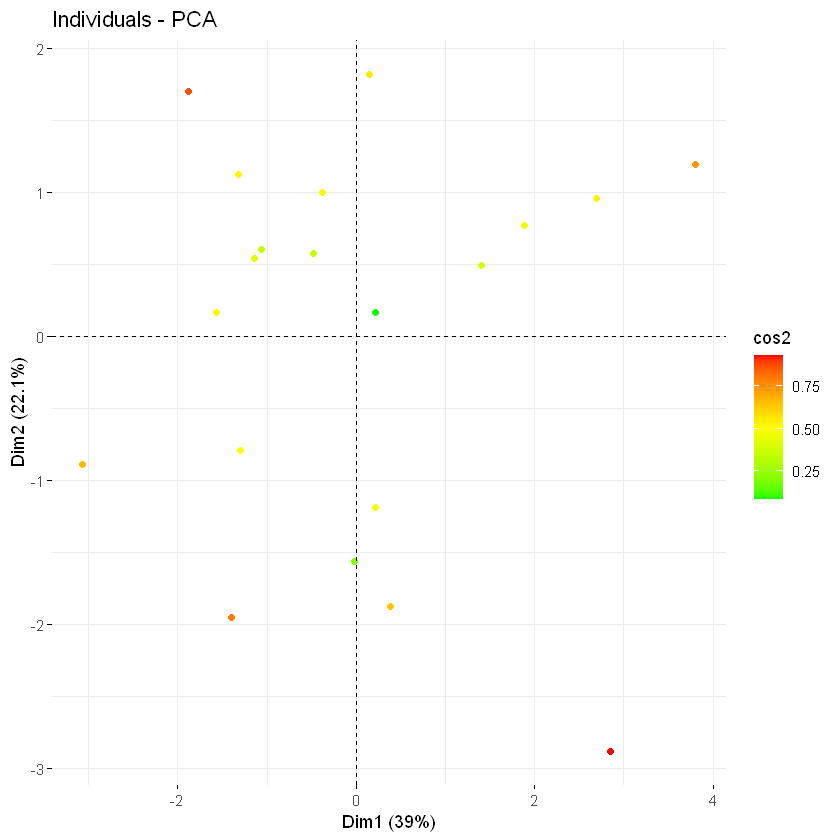

In [64]:
fviz_pca_ind(pca, col.ind="cos2", geom = "point", gradient.cols = c("green", "yellow", "red" ))

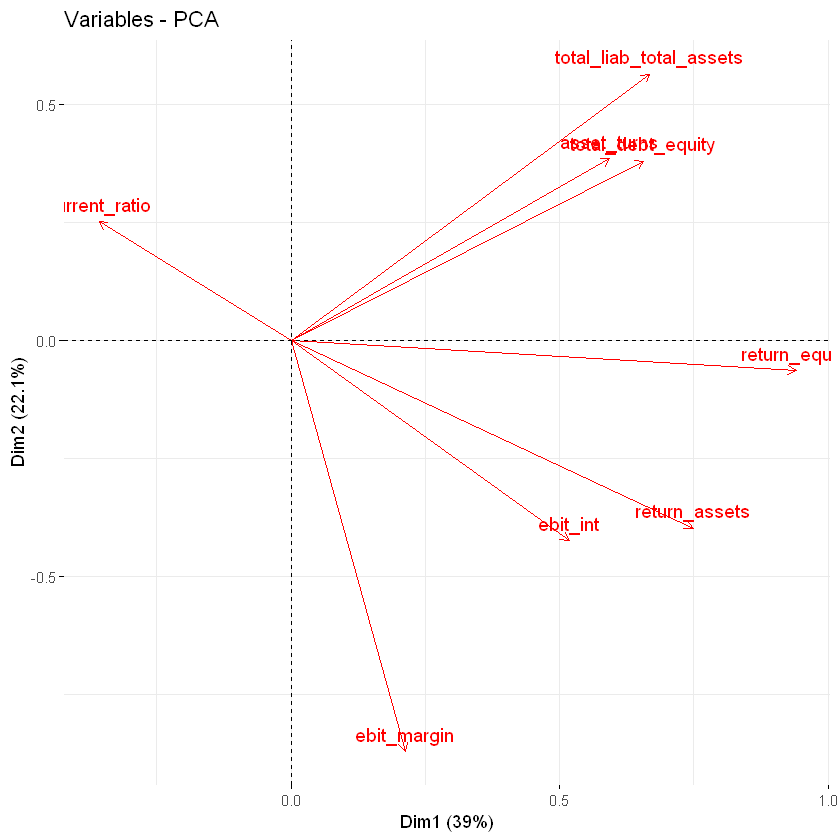

In [65]:
fviz_pca_var(pca, col.var = "red")

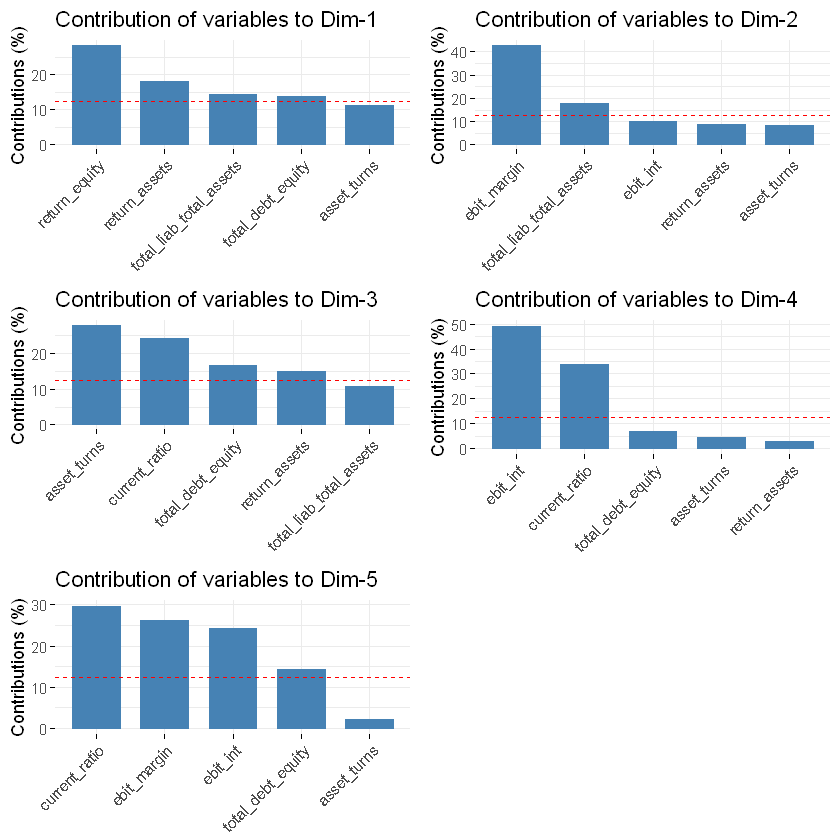

In [66]:
PC1 <- fviz_contrib(pca, choice = "var", axes = 1,top=5)
PC2 <- fviz_contrib(pca, choice = "var", axes = 2,top=5)
PC3 <- fviz_contrib(pca, choice = "var", axes = 3,top=5)
PC4 <- fviz_contrib(pca, choice = "var", axes = 4,top=5)
PC5 <- fviz_contrib(pca, choice = "var", axes = 5,top=5)
grid.arrange(PC1, PC2, PC3, PC4, PC5)

## Clustering

In [37]:
install.packages("clValid", repo="http://cran.r-project.org",dep=TRUE)
library(clValid)

Warning message:
"dependencies 'Biobase', 'annotate', 'GO.db', 'moe430a.db' are not available"

package 'clValid' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpWscaCT\downloaded_packages


Warning message:
"package 'clValid' was built under R version 3.6.3"
Attaching package: 'clValid'

The following object is masked from 'package:flexclust':

    clusters

The following object is masked from 'package:modeltools':

    clusters



In [67]:
intern <- clValid(df_adj_z, nClust = 2:24, 
              clMethods = c("hierarchical","kmeans","pam"), validation = "internal")

ERROR: Error in silhouette(cluster, dmatrix = as.matrix(Dist))[, 3]: falsche Anzahl von Dimensionen


In [39]:
summary(intern)

ERROR: Error in summary(intern): Objekt 'intern' nicht gefunden


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2401  0.3836  0.4316  0.5135  0.5872  1.0000 

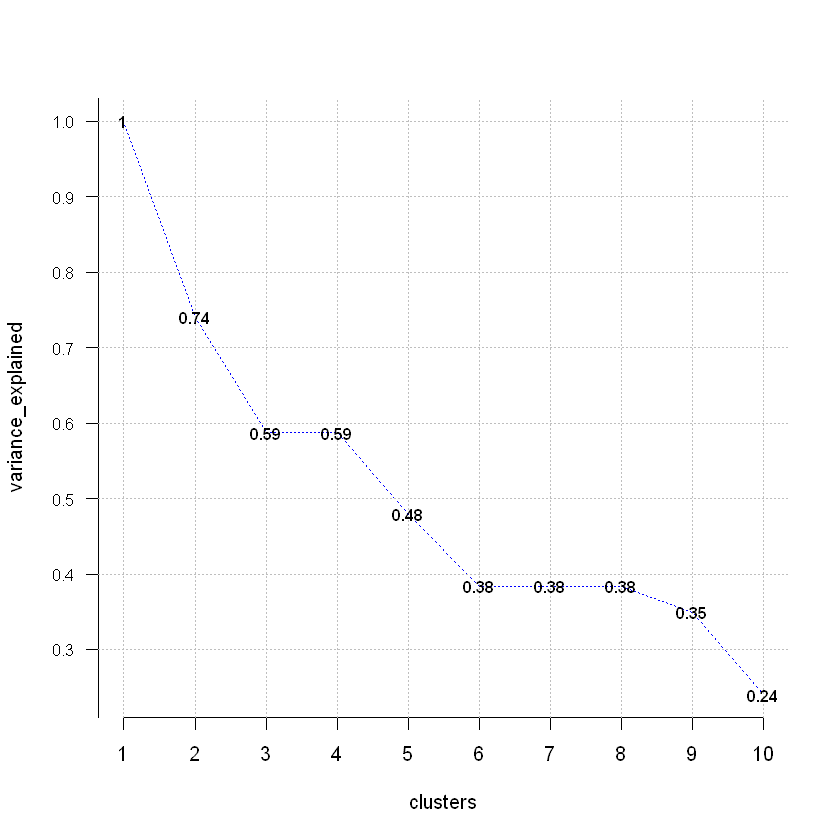

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1998  0.2305  0.2140  0.2699  0.2853 

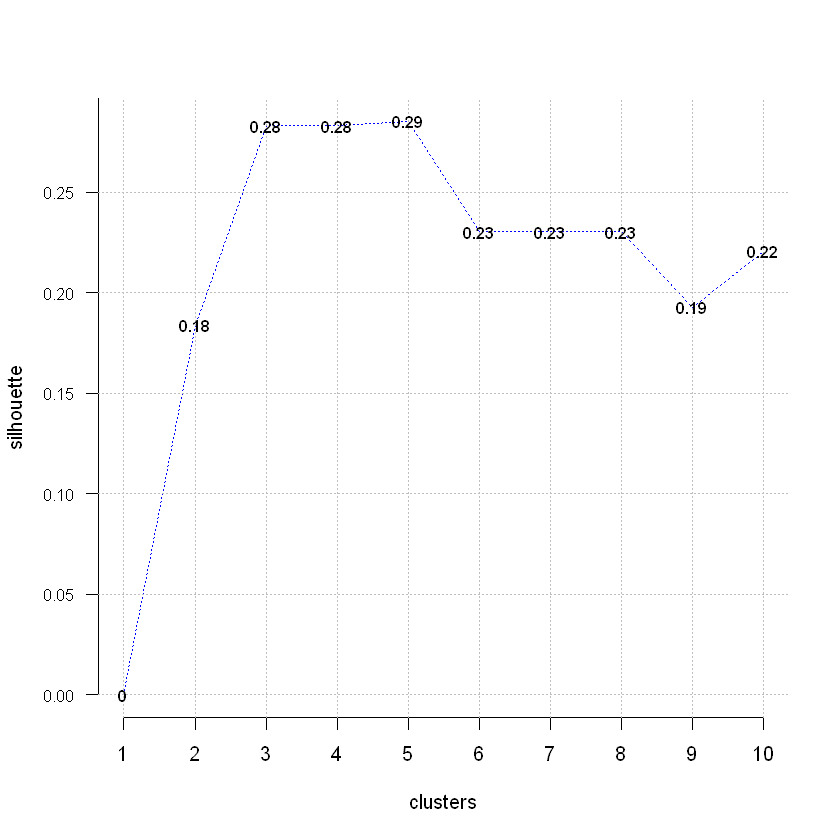

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  137.3   153.0   161.2   166.0   182.3   197.1 

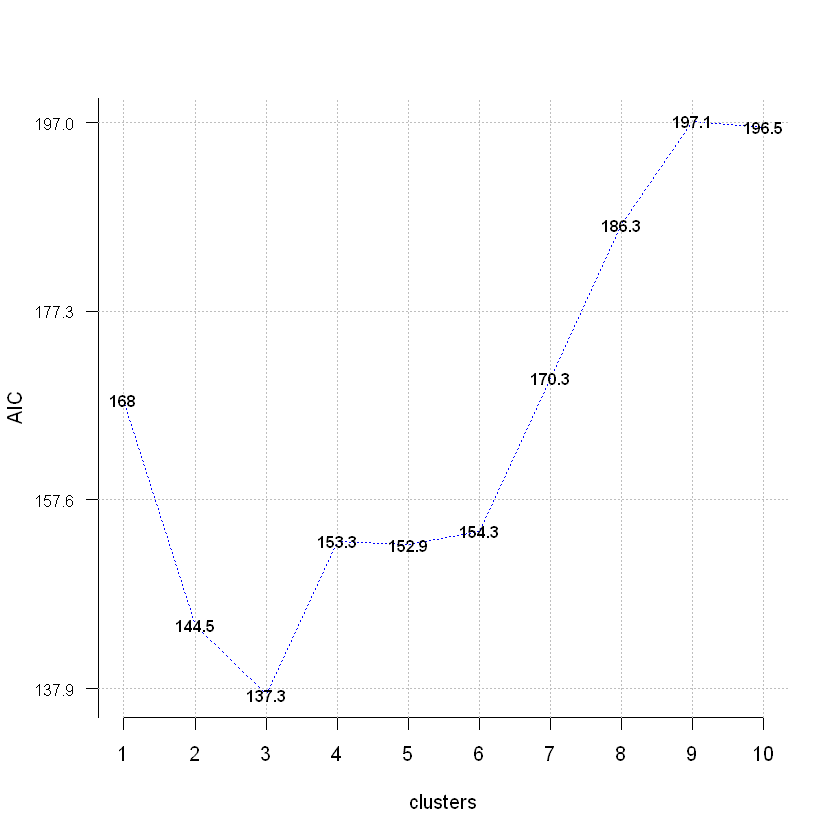

In [68]:
# optimal number of clusters Kmeans
opt2<-Optimal_Clusters_KMeans(df_adj_z, max_clusters=10, plot_clusters = TRUE)
summary(opt2)
opt2<-Optimal_Clusters_KMeans(df_adj_z, max_clusters=10, plot_clusters=TRUE, criterion="silhouette")
summary(opt2)
opt2<-Optimal_Clusters_KMeans(df_adj_z, max_clusters=10, plot_clusters=TRUE, criterion="AIC")
summary(opt2)

In [42]:
df_adj_z

,return_assets,return_capital,return_equity,return_invested_capital,return_common_equity,gross_margin,sga_margin,ebitda_margin,ebita_margin,ebit_margin,...,total_debt_ebitda_capex,net_debt_ebitda_capex,ebitda_excl_oper_leases_int,ebitda_excl_oper_leases_capex_int,total_debt_ebitda_excl_oper_leases,net_debt_ebitda_excl_oper_leases,total_debt_ebitda_excl_oper_leases_capex,net_debt_ebitda_excl_oper_leases_capex,z_score,capex_pct_rev
ADS.DE,1.47139300,1.89212905,1.28544498,1.95235275,1.32592533,0.65230174,1.359647325,-0.89313803,-0.59460560,-0.41780654,...,-1.18258488,-1.29223825,-0.4509473,-0.26405102,-0.88415357,-1.29559634,-1.09508867,-1.31122317,2.4222294,-1.0410044
AI.PA,0.65600227,0.30241539,0.23114474,0.25010446,0.21347876,1.48420526,-0.097085985,1.03538005,0.67158901,0.87049650,...,0.25977891,0.70767234,-0.5290177,-0.78035650,-0.53042907,0.04150332,0.28009570,0.75488599,0.6517791,2.4344809
ABI.BR,-0.09984337,-0.33289015,-0.36997231,-0.29339449,-0.43332208,1.13928964,0.820176546,2.04726854,2.31590493,2.49720807,...,1.18387151,1.62734807,-1.2234763,-1.12543386,1.19315178,1.70748051,1.11578351,1.57604347,-1.3216765,1.0690806
BAS.DE,0.06093947,0.03883536,-0.86371842,-1.50929130,-0.92690944,-0.92758222,-0.588437575,-0.70137784,-0.95942352,-0.71287056,...,-0.62321421,-0.21371011,-0.3256834,-0.41482683,-0.92630391,-0.41670216,-0.79454723,-0.32124795,0.4614779,-0.1532809
BMW.DE,-0.35421289,-0.52315605,0.65823791,0.94670937,0.67505978,-1.44733341,-1.053430421,-0.57387275,-0.48860215,-0.25850410,...,2.47377138,2.44566192,1.4171986,0.90838894,1.95788957,2.05446517,2.47502340,2.42861710,-1.0955591,0.0578687
CRG.IR,-0.08598278,-0.22821706,-0.54387990,-0.44700778,-0.56063940,-0.33702326,0.253029088,-0.55049076,-0.68054380,-0.46586621,...,-0.39665554,-0.61763838,-0.6643412,-0.61400271,-0.38593518,-0.62058450,-0.42889405,-0.63990899,0.2649365,-0.3949724
DAI.DE,-0.22625194,-0.30303469,1.14032815,0.77378118,1.14025970,-1.18426346,-0.966859330,-0.79216974,-0.62089038,-0.42912291,...,1.77933091,1.73430856,2.3082866,2.12405440,1.92775034,1.90570733,1.74264716,1.69676565,-1.1541930,-0.5510447
BN.PA,0.12957710,-0.03451456,0.03657448,-1.74436783,-0.02081920,0.48656429,0.816715151,0.14948905,-0.03340591,0.20309227,...,0.25067067,0.07011205,-0.6789975,-0.59331007,0.24680499,0.08706471,0.06688835,-0.04727801,-0.2893779,-0.2329839
DPW.DE,2.00225355,2.32778963,2.49914112,0.52192642,2.40433321,-1.35311079,-1.508053565,-0.99037916,-0.78009044,-0.55685126,...,-0.81675848,-0.54132964,-0.4793311,-0.61148097,-0.80450131,-0.49654089,-0.51302322,-0.29470754,0.5978783,-0.1493769
ENI.MI,-1.33947900,-1.12545591,-1.64685824,-1.81380002,-1.68635530,-0.69412186,-1.164064728,0.12966671,-1.27892519,-1.17497337,...,0.02336612,-0.40268153,-0.7048655,-0.79229354,-0.28992500,-0.57138549,0.14350481,-0.35310691,-1.2581093,0.8621954


In [47]:
str(df_adj_z)

'data.frame':	20 obs. of  47 variables:
 $ return_assets                           : num  1.4714 0.656 -0.0998 0.0609 -0.3542 ...
 $ return_capital                          : num  1.8921 0.3024 -0.3329 0.0388 -0.5232 ...
 $ return_equity                           : num  1.285 0.231 -0.37 -0.864 0.658 ...
 $ return_invested_capital                 : num  1.952 0.25 -0.293 -1.509 0.947 ...
 $ return_common_equity                    : num  1.326 0.213 -0.433 -0.927 0.675 ...
 $ gross_margin                            : num  0.652 1.484 1.139 -0.928 -1.447 ...
 $ sga_margin                              : num  1.3596 -0.0971 0.8202 -0.5884 -1.0534 ...
 $ ebitda_margin                           : num  -0.893 1.035 2.047 -0.701 -0.574 ...
 $ ebita_margin                            : num  -0.595 0.672 2.316 -0.959 -0.489 ...
 $ ebit_margin                             : num  -0.418 0.87 2.497 -0.713 -0.259 ...
 $ earning_co_margin                       : num  -0.38 1.079 1.261 -1.296 0.394 ...


In [48]:
library(factoextra)
library(cluster)

In [69]:
# Clustering KMediods
opt3<-Optimal_Clusters_Medoids(df_adj_z, 10, 'euclidean', plot_clusters=TRUE)
#summary(opt3)
#opt3<-Optimal_Clusters_Medoids(df_adj_z, 10, 'euclidean', plot_clusters=TRUE, criterion = "silhouette" )
#summary(opt3)

Based on the plot give the number of clusters (greater than 1) that you consider optimal?  5


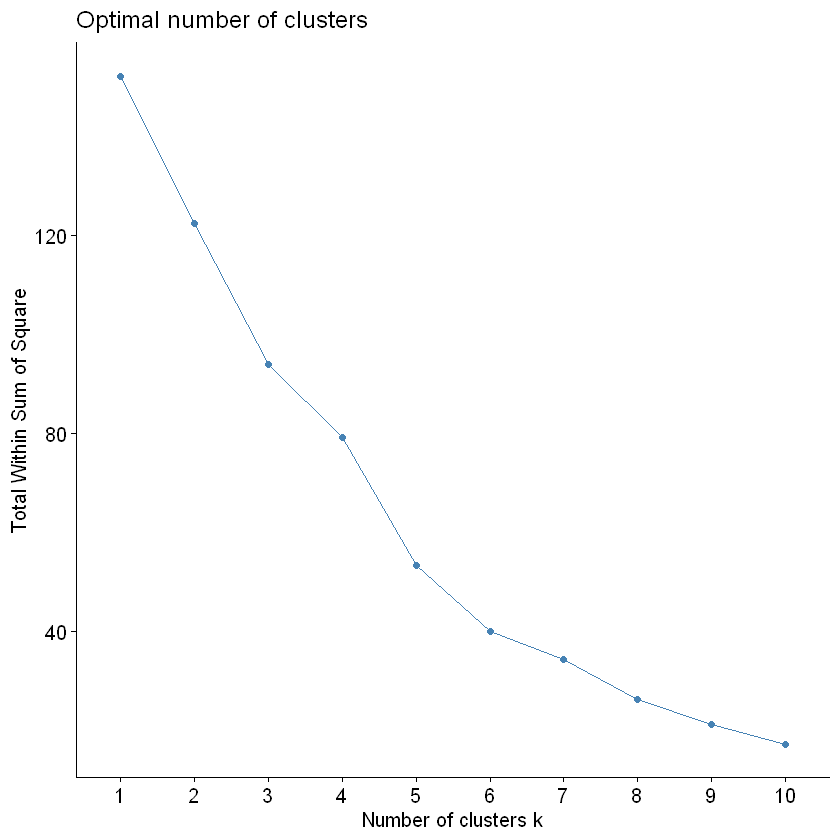

In [70]:
fviz_nbclust(df_adj_z, pam, method = "wss")

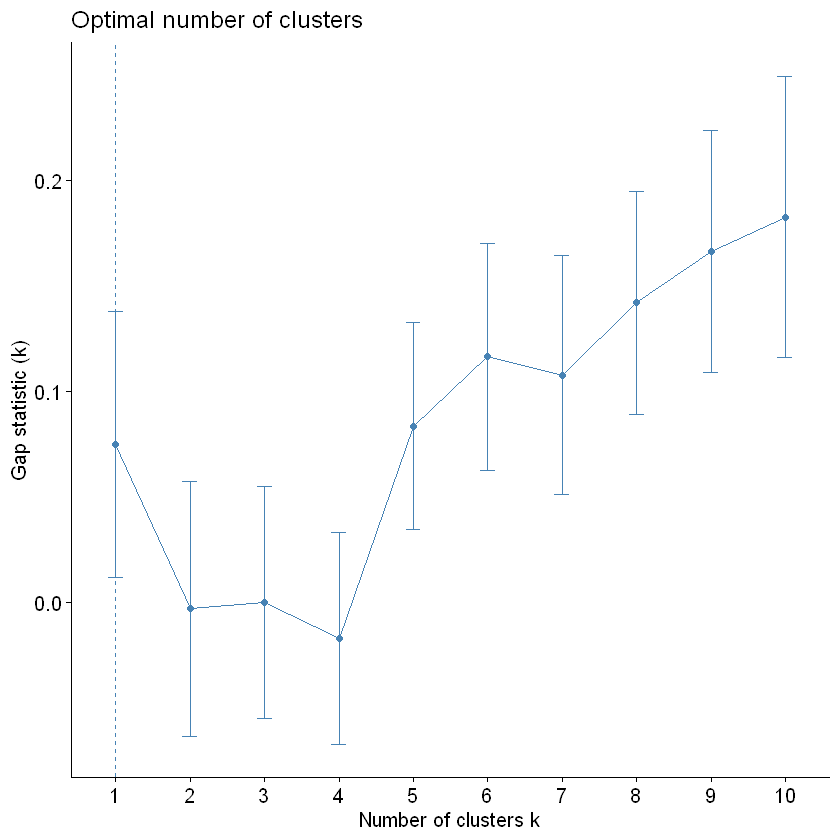

In [71]:
gap_stat <- clusGap(df_adj_z,
                    FUN = pam,
                    K.max = 10, #max clusters to consider
                    B = 50) #total bootstrapped iterations

#plot number of clusters vs. gap statistic
fviz_gap_stat(gap_stat)

In [44]:
# opt1<-NbClust(df_adj_z, distance="euclidean", min.nc=2, max.nc=8, method="complete", index="ch")
# opt1 # it chooses the best partition
# opt1$All.index
# opt1$Best.nc
# opt1$Best.partition





# automatic selection, average silhouette width
opt_aut<-pamk(df_adj_z, krange=2:10, criterion="asw", usepam=TRUE, scaling=FALSE, alpha=0.001, diss=inherits(df_adj_z, "dist"), critout=FALSE) # fpc::pamk()
class(opt_aut)
opt_aut

[1] "list"

$pamobject
Medoids:
       ID return_assets return_capital return_equity return_invested_capital
CRG.IR  6   -0.08598278     -0.2282171    -0.5438799              -0.4470078
BMW.DE  5   -0.35421289     -0.5231561     0.6582379               0.9467094
       return_common_equity gross_margin sga_margin ebitda_margin ebita_margin
CRG.IR           -0.5606394   -0.3370233  0.2530291    -0.5504908   -0.6805438
BMW.DE            0.6750598   -1.4473334 -1.0534304    -0.5738727   -0.4886022
       ebit_margin earning_co_margin  ni_margin ni_norm_margin
CRG.IR  -0.4658662        -0.7461143 -0.8236601     -0.9098287
BMW.DE  -0.2585041         0.3937114  0.4581153      0.1266775
       ni_avail_excl_margin lfcf_margin ufcf_margin asset_turns
CRG.IR           -0.7539277  -0.1460475  -0.1759622   0.3018447
BMW.DE            0.5212520  -0.2463642  -0.3060519  -0.2407856
       fixed_asset_turns   ar_turns inventory_turns current_ratio quick_ratio
CRG.IR        -0.9879014 -0.4387909      -0.2370344  

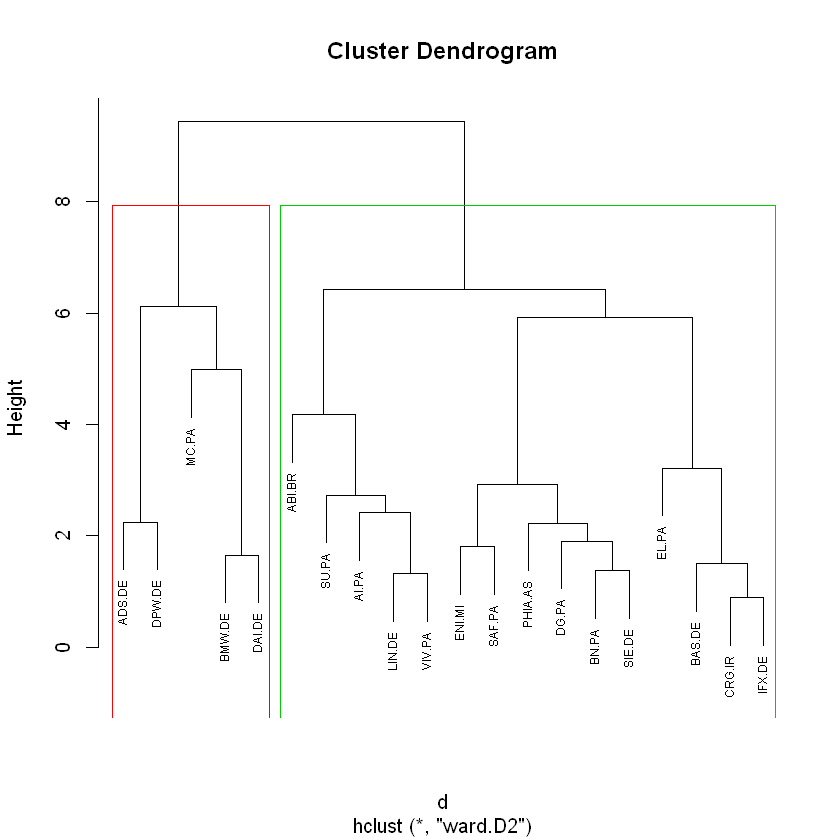

In [72]:
# Compute dissimilarity matrix with euclidean distances
d <- dist(df_adj_z, method = "euclidean")
# Hierarchical clustering using Ward's methodc
res.hc <- hclust(d, method = "ward.D2" )
# Cut tree into 5 groups
grp <- cutree(res.hc, k = 2)
# Visualize
plot(res.hc, cex = 0.6) # plot tree
rect.hclust(res.hc, k = 2, border = 2:5) # add rectangle

In [233]:
intern <- clValid(df_adj_z, nClust = 2:24, 
              clMethods = c("hierarchical","kmeans","pam"), validation = "internal")

In [234]:
summary(intern)


Clustering Methods:
 hierarchical kmeans pam 

Cluster sizes:
 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 

Validation Measures:
                                 2       3       4       5       6       7       8       9      10      11      12      13      14      15      16      17      18      19      20      21      22      23      24
                                                                                                                                                                                                                  
hierarchical Connectivity   7.4687  7.9298 10.7159 17.4694 24.4905 25.9905 36.5187 37.5520 39.1187 42.9448 43.1560 45.6560 47.1560 49.4754 50.6627 53.5917 54.8417 56.3417 58.5083 65.6111 66.9444 68.9444 72.7262
             Dunn           0.3512  0.3512  0.3331  0.2831  0.2153  0.2153  0.2443  0.2443  0.2443  0.3460  0.3460  0.3460  0.3460  0.3460  0.3460  0.4136  0.4136  0.4136  0.4136  0.2197  0.2197  0.2197  0.2309
        

[1] "20 %" "10 %" "10 %" "10 %" "30 %" "20 %"


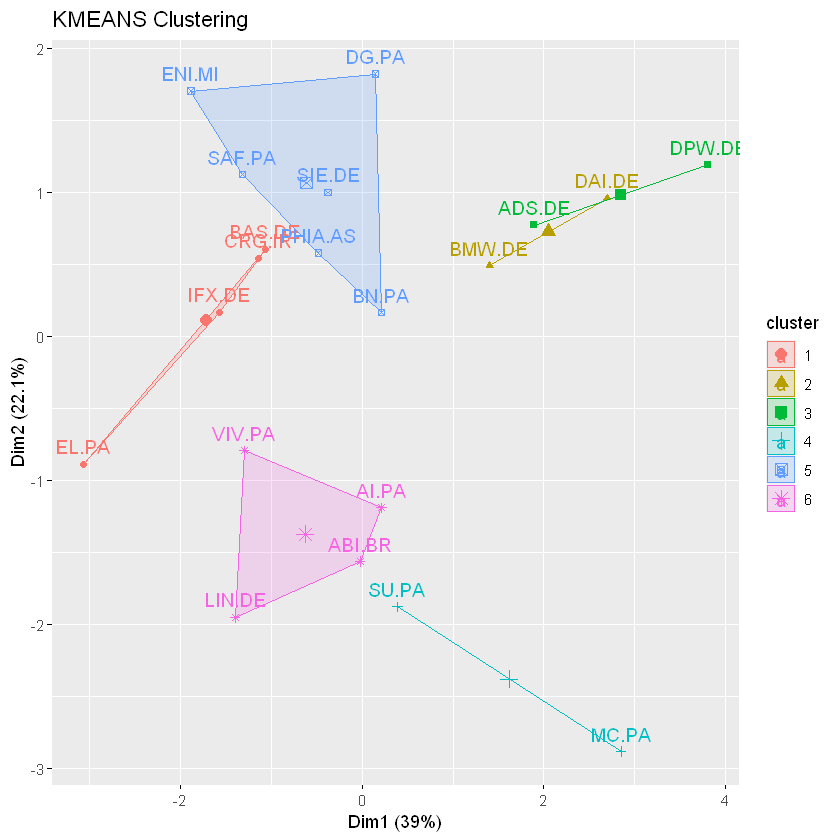

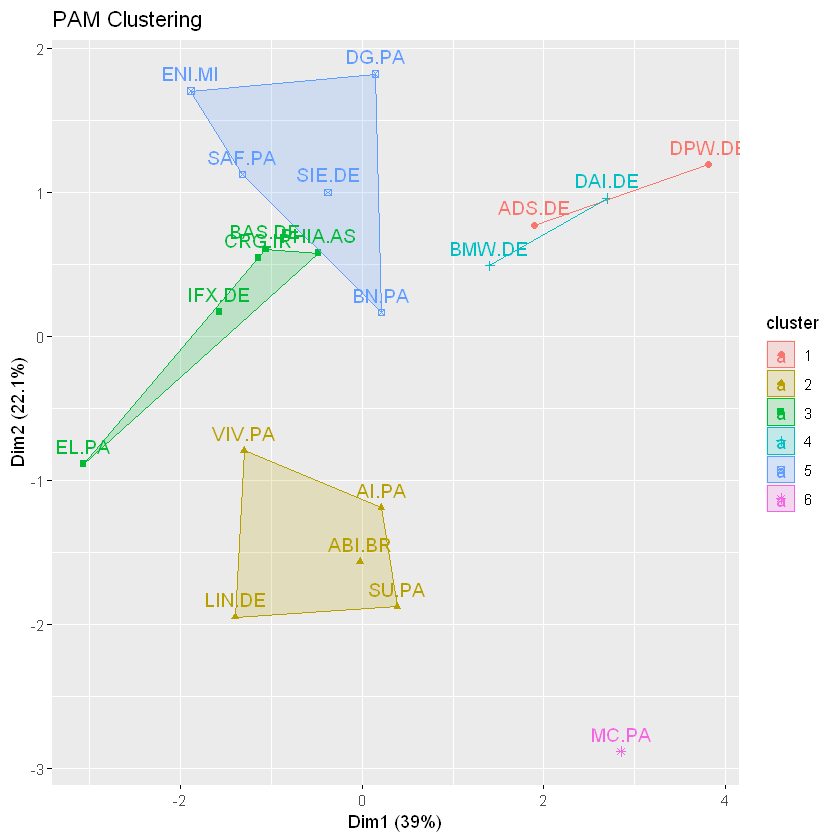

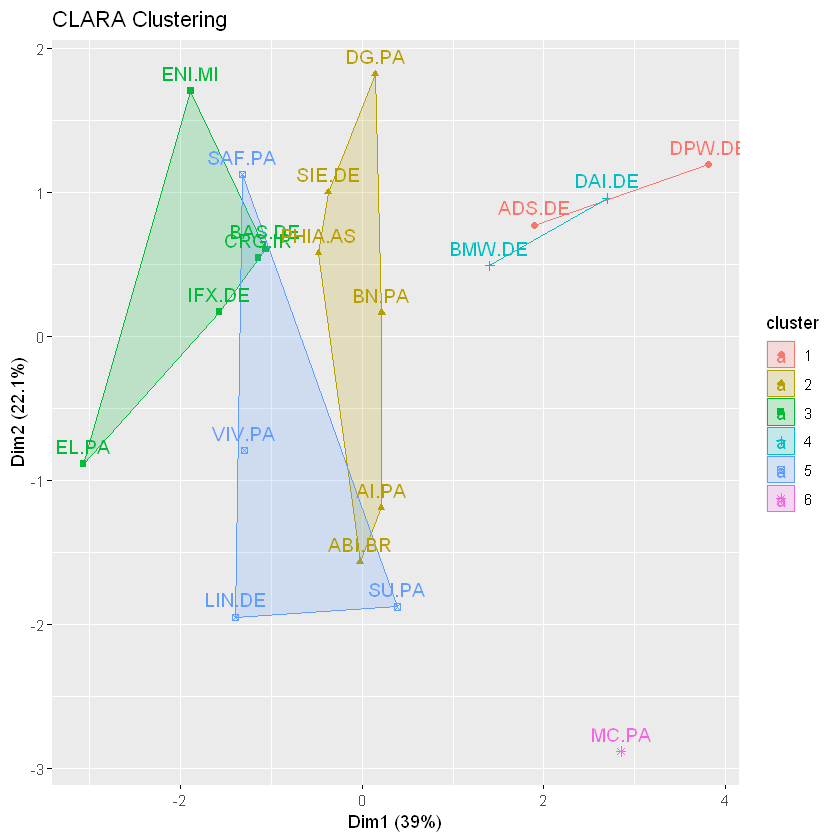

In [73]:
# kmeans
cluster_kmeans<-eclust(df_adj_z, "kmeans", k= 6) 
print(paste(cluster_kmeans$size/sum(cluster_kmeans$size)*100,"%"))
# pam
cluster_pam<-eclust(df_adj_z, "pam", k= 6) 
# clara
cluster_clara<-eclust(df_adj_z, "clara", k=6)


### Clustering with PCA

In [ ]:
# Predict the PC values for the data
df_pca <- data.frame(predict(pca,df_adj_z)[,1:10])
df_pca

In [ ]:
str(df_adj_z)

In [ ]:
df_adj_z[1:47]

In [ ]:
is.null(df_pca)

In [ ]:
intern <- clValid(df_pca, nClust = 2:24, 
              clMethods = c("hierarchical","kmeans","pam"), validation = "internal")

In [ ]:
summary(intern)

In [ ]:
# Compute dissimilarity matrix with euclidean distances
d <- dist(df_pca, method = "euclidean")
# Hierarchical clustering using Ward's methodc
res.hc <- hclust(d, method = "ward.D2" )
# Cut tree into 5 groups
grp <- cutree(res.hc, k = 2)
# Visualize
plot(res.hc, cex = 0.6) # plot tree
rect.hclust(res.hc, k = 2, border = 2:5) # add rectangle

In [ ]:
# opt1<-NbClust(df_adj_z, distance="euclidean", min.nc=2, max.nc=8, method="complete", index="ch")
# opt1 # it chooses the best partition
# opt1$All.index
# opt1$Best.nc
# opt1$Best.partition

# optimal number of clusters, another criteria
opt2<-Optimal_Clusters_KMeans(df_pca, max_clusters=15, plot_clusters = TRUE)
summary(opt2)
opt2<-Optimal_Clusters_KMeans(df_pca, max_clusters=15, plot_clusters=TRUE, criterion="silhouette")
summary(opt2)
opt2<-Optimal_Clusters_KMeans(df_pca, max_clusters=15, plot_clusters=TRUE, criterion="AIC")
summary(opt2)

# # another approach, decision based on a plot
# opt3<-Optimal_Clusters_Medoids(df_pca, 10, 'euclidean', plot_clusters=TRUE)

# # automatic selection, average silhouette width
# opt_aut<-pamk(df_pca, krange=2:10, criterion="asw", usepam=TRUE, scaling=FALSE, alpha=0.001, diss=inherits(df_adj_z, "dist"), critout=FALSE) # fpc::pamk()
# class(opt_aut)
# opt_aut

In [ ]:
# kmeans
cluster_kmeans<-eclust(df_pca, "kmeans", k= 8) 
print(paste(cluster_kmeans$size/sum(cluster_kmeans$size)*100,"%"))
# pam
#cluster_pam<-eclust(df_pca, "pam", k= 8) 
# clara
#cluster_clara<-eclust(df_pca, "clara", k=8)


In [ ]:
# install the packages
install.packages("factoextra")
install.packages("flexclust")
install.packages("fpc")
install.packages("clustertend")
install.packages("cluster")
install.packages("ClusterR")
install.packages("tidyverse")
install.packages("dendextend")
library(factoextra)
library(flexclust)
library(fpc)
library(clustertend)
library(cluster)
library(ClusterR)
library(tidyverse)
library(dendextend)

In [ ]:
# kmeans
cluster_kmeans<-eclust(df_adj_z, "kmeans", k= 5) 
print(paste(cluster_kmeans$size/sum(cluster_kmeans$size)*100,"%"))
# pam
cluster_pam<-eclust(df_adj_z, "pam", k= 5) 
# clara
cluster_clara<-eclust(df_adj_z, "clara", k=5)


In [44]:
# optimal number of clusters
install.packages("NbClust")
library(NbClust)
library(help="NbClust") # only one function in a package

package 'NbClust' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpCAFaau\downloaded_packages


Documentation for package 'NbClust'


		Information on package 'NbClust'

Description:

Package:            NbClust
Type:               Package
Title:              Determining the Best Number of Clusters in a Data
                    Set
Version:            3.0
Depends:            R (>= 3.1.0)
Date:               2015-04-13
Author:             Malika Charrad and Nadia Ghazzali and Veronique
                    Boiteau and Azam Niknafs
Maintainer:         Malika Charrad <malika.charrad.1@ulaval.ca>
Description:        It provides 30 indexes for determining the optimal
                    number of clusters in a data set and offers the
                    best clustering scheme from different results to
                    the user.
URL:                https://sites.google.com/site/malikacharrad/research/nbclust-package
License:            GPL-2
Packaged:           2015-04-13 13:57:52 UTC; toshiba
NeedsCompilation:   no
Repository:         CRAN
Date/Publication:   2015-04-13 22:54:43
Bui

number of clusters estimated by optimum average silhouette width: 3 


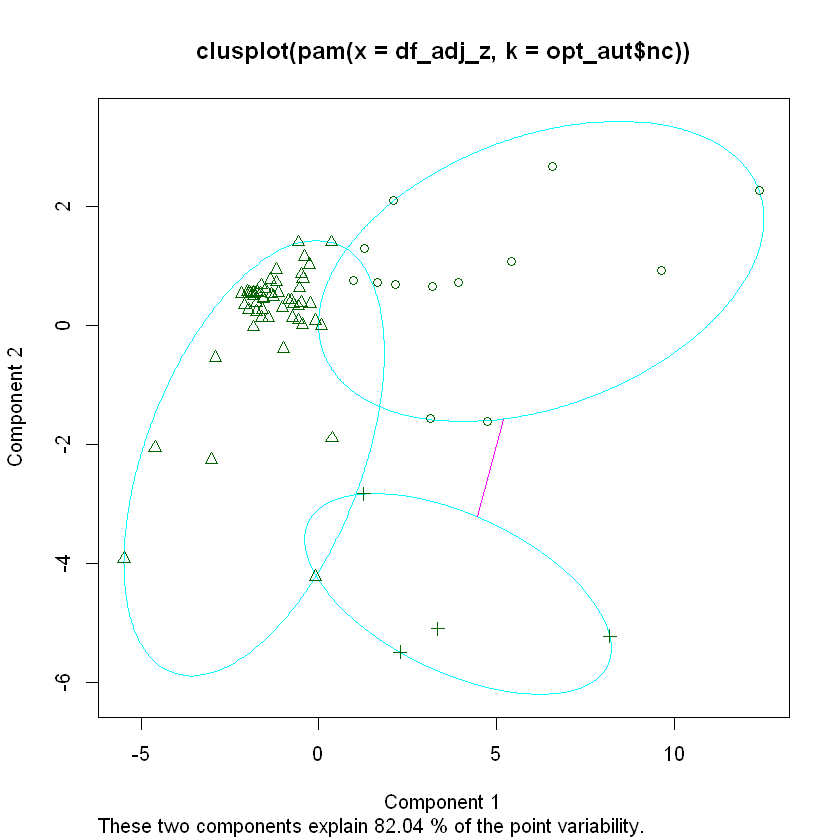

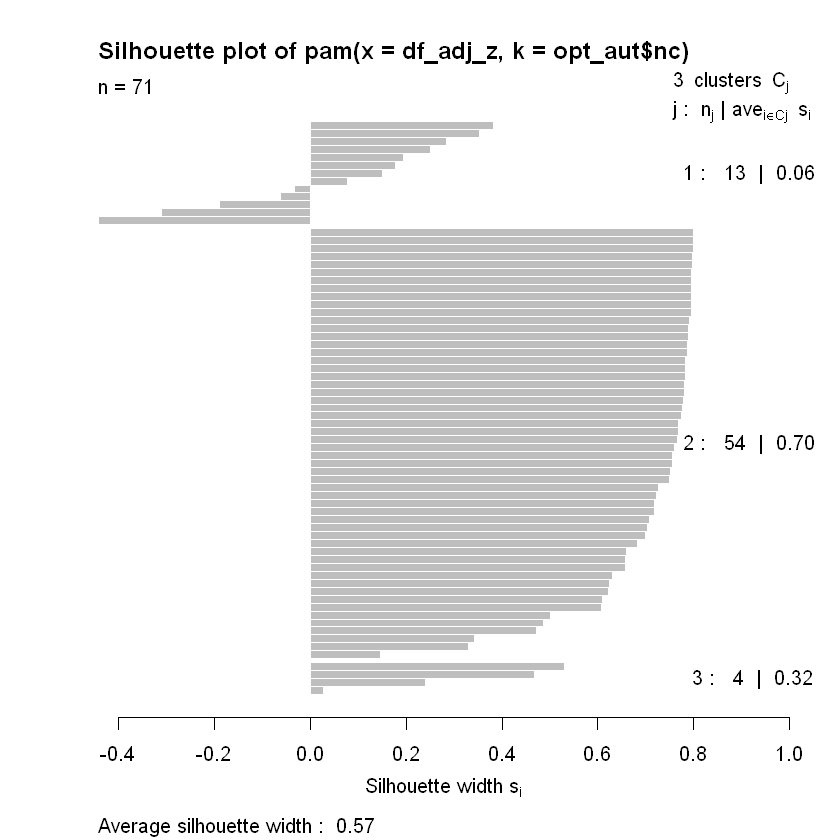

In [46]:
# announcement and plot
cat("number of clusters estimated by optimum average silhouette width:", opt_aut$nc, "\n")
plot(pam(df_adj_z, opt_aut$nc))

Warning message:
"Package `clustertend` is deprecated.  Use package `hopkins` instead."

$H
[1] 0.1462312

$hopkins_stat
[1] 0.8861252

$plot


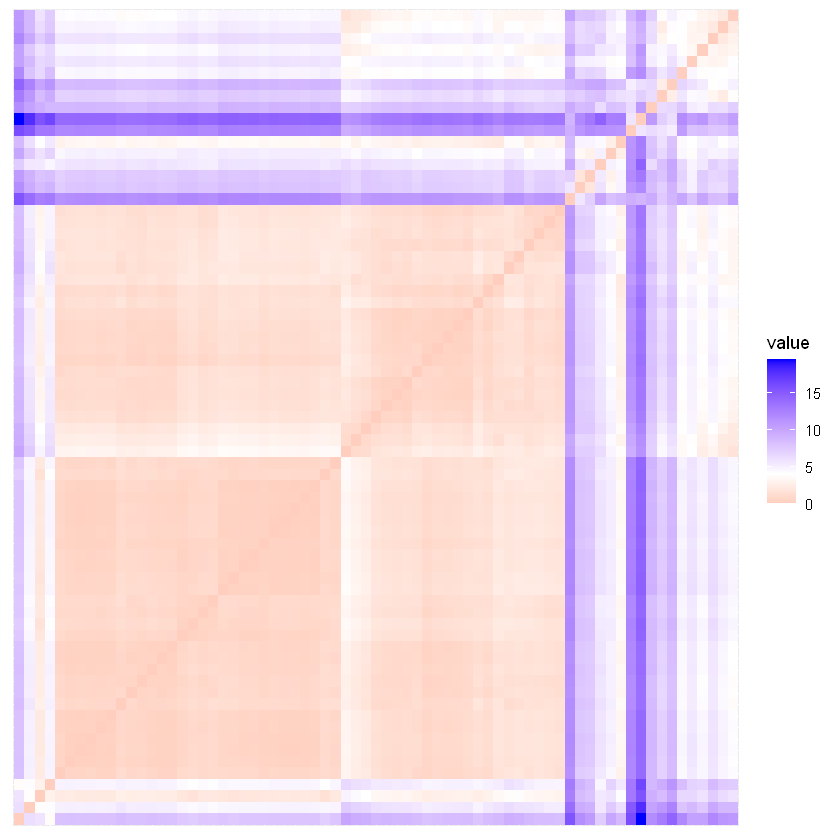

In [74]:
# Hopkins stat
hopkins(df_adj_z, n=nrow(df_adj_z)-1) 

get_clust_tendency(df_adj_z, 2, graph=TRUE, gradient=list(low="red", mid="white", high="blue"), seed = 123) # factoextra:: #interpretation as in table

In [75]:
# agglomerative approach
# dissimilarity matrix
d <- dist(df_adj_z, method = "euclidean")
# complete linkage
cluster_hierarchical <- hclust(d, method = "complete" )

# cut tree into 4 groups
sub_grp_2 <- cutree(cluster_hierarchical, k = 2)

# cut tree into 4 groups
sub_grp_4 <- cutree(cluster_hierarchical, k = 4)

# various measures of clustering quality
c.stat<-cluster.stats(d,sub_grp_2)
c.stat

c.stat2<-cluster.stats(d,sub_grp_4)
c.stat2

0.000000,5.046472
5.046472,0.000000
0.00000,11.76175
11.76175,0.00000


0.000000,2.378675,5.581892,1.514212
2.378675,0.000000,5.046472,8.481921
5.581892,5.046472,0.000000,12.531709
1.514212,8.481921,12.531709,0.000000
0.000000,7.430732,11.757003,5.717078
7.430732,0.000000,7.445687,10.750527
11.757003,7.445687,0.000000,15.071143
5.717078,10.750527,15.071143,0.000000
